In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Patient Survival Prediction.csv")

In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   9999 non-null   int64  
 1   patient_id                     9999 non-null   int64  
 2   hospital_id                    9999 non-null   int64  
 3   age                            9522 non-null   float64
 4   bmi                            8255 non-null   float64
 5   elective_surgery               9999 non-null   int64  
 6   ethnicity                      9766 non-null   object 
 7   gender                         9996 non-null   object 
 8   height                         9842 non-null   float64
 9   icu_admit_source               9978 non-null   object 
 10  icu_id                         9999 non-null   int64  
 11  icu_stay_type                  9999 non-null   object 
 12  icu_type                       9999 non-null   o

In [ ]:
df.shape

(9999, 83)

In [ ]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
age                             477
bmi                            1744
                               ... 
lymphoma                         75
solid_tumor_with_metastasis      75
apache_3j_bodysystem            254
apache_2_bodysystem             254
hospital_death                    0
Length: 83, dtype: int64

In [ ]:
for column in df.columns:
    if df[column].dtype == 'float64':
        # Handle numeric columns (replace NaN with mean)
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Handle categorical columns (replace NaN with mode)
        df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 83, dtype: int64

In [ ]:
df["hospital_death"]

0       0
1       0
2       0
3       0
4       0
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: hospital_death, Length: 9999, dtype: int64

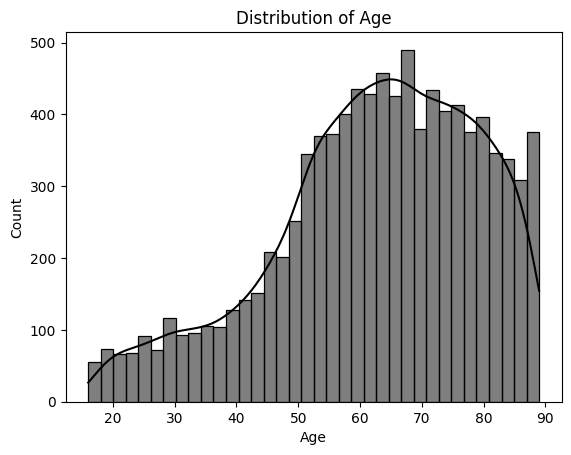

In [ ]:
sns.histplot(df['age'], kde=True, color="Black")

plt.xlabel("Age")
plt.ylabel("Count")

plt.title("Distribution of Age")

plt.show()

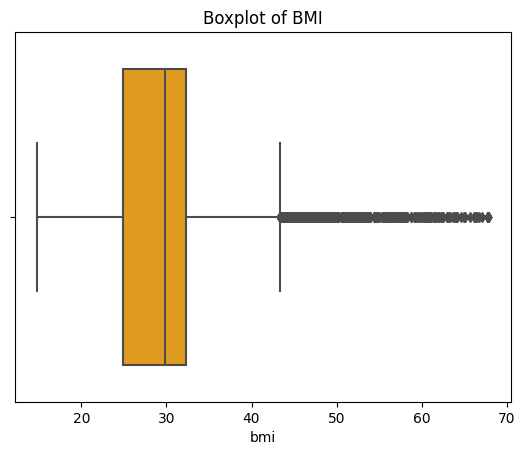

In [ ]:
sns.boxplot(x=df['bmi'], color="Orange")

plt.xlabel("bmi")

plt.title("Boxplot of BMI")

plt.show()

In [ ]:
df['gender'].value_counts()

M    5440
F    4559
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f69880437f0>,
 [Text(-0.5972255302775132, -0.9237541155441439, 'Male'),
  Text(0.5972256167656136, 0.9237540596278496, 'Female')],
 [Text(-0.3257593801513708, -0.5038658812058966, '54.0%'),
  Text(0.3257594273266983, 0.5038658507060997, '46.0%')])

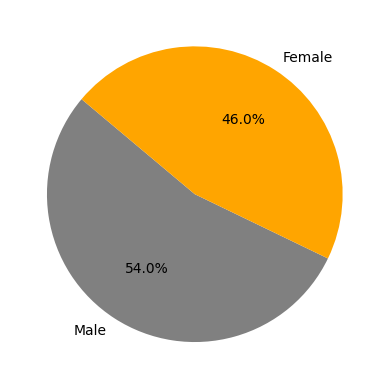

In [ ]:
labels = ['Male', 'Female']

# Define sizes for each segment of the pie chart
sizes = [49469, 42219]

colors = ["Grey", "Orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [ ]:
df.groupby(['gender']).agg({'hospital_death': 'count'})

,hospital_death
gender,
F,4559
M,5440


from matplotlib import pyplot as plt
_df_0['hospital_death'].plot(kind='hist', bins=20, title='hospital_death')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hospital_death']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hospital_death'}, axis=1)
              .sort_values('hospital_death', ascending=True))
  xs = counted['hospital_death']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('hospital_death', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hospital_death')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['hospital_death'].plot(kind='line', figsize=(8, 4), title='hospital_death')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_3['hospital_death'].plot(kind='hist', bins=20, title='hospital_death')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hospital_death']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hospital_death'}, axis=1)
              .sort_values('hospital_death', ascending=True))
  xs = counted['hospital_death']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('hospital_death', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hospital_death')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['hospital_death'].plot(kind='line', figsize=(8, 4), title='hospital_death')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='hospital_death', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

df = pd.read_csv('Patient Survival Prediction.csv')

# Variable 1
var1_mean = df['apache_2_diagnosis'].mean()
var1_median = df['apache_2_diagnosis'].median()
var1_mode = df['apache_2_diagnosis'].mode().iloc[0]
var1_std = df['apache_2_diagnosis'].std()

# Variable 2
var2_mean = df['apache_3j_diagnosis'].mean()
var2_median = df['apache_3j_diagnosis'].median()
var2_mode = df['apache_3j_diagnosis'].mode().iloc[0]
var2_std = df['apache_3j_diagnosis'].std()

# Variable 3
var3_mean = df['heart_rate_apache'].mean()
var3_median = df['heart_rate_apache'].median()
var3_mode = df['heart_rate_apache'].mode().iloc[0]
var3_std = df['heart_rate_apache'].std()

print("Variable 1: Mean =", var1_mean, " Median =", var1_median, " Mode =", var1_mode, " Standard Deviation =", var1_std)
print("Variable 2: Mean =", var2_mean, " Median =", var2_median, " Mode =", var2_mode, " Standard Deviation =", var2_std)
print("Variable 3: Mean =", var3_mean, " Median =", var3_median, " Mode =", var3_mode, " Standard Deviation =", var3_std)

Variable 1: Mean = 187.0206259620318  Median = 123.0  Mode = 113.0  Standard Deviation = 84.62897923921325
Variable 2: Mean = 606.2986034028763  Median = 501.02  Mode = 501.05  Standard Deviation = 490.77172561136865
Variable 3: Mean = 98.43081729315732  Median = 103.0  Mode = 100.0  Standard Deviation = 31.31298209720966


In [ ]:
import pandas as pd

df = pd.read_csv('Patient Survival Prediction.csv')

# Variable 4
var4_mean = df['map_apache'].mean()
var4_median = df['map_apache'].median()
var4_mode = df['map_apache'].mode().iloc[0]
var4_std = df['map_apache'].std()

# Variable 5
var5_mean = df['resprate_apache'].mean()
var5_median = df['resprate_apache'].median()
var5_mode = df['resprate_apache'].mode().iloc[0]
var5_std = df['resprate_apache'].std()

# Variable 6
var6_mean = df['temp_apache'].mean()
var6_median = df['temp_apache'].median()
var6_mode = df['temp_apache'].mode().iloc[0]
var6_std = df['temp_apache'].std()

print("Variable 4: Mean =", var4_mean, " Median =", var4_median, " Mode =", var4_mode, " Standard Deviation =", var4_std)
print("Variable 5: Mean =", var5_mean, " Median =", var5_median, " Mode =", var5_mode, " Standard Deviation =", var5_std)
print("Variable 6: Mean =", var6_mean, " Median =", var6_median, " Mode =", var6_mode, " Standard Deviation =", var6_std)

Variable 4: Mean = 95.03733225708808  Median = 78.0  Mode = 56.0  Standard Deviation = 40.56330178588079
Variable 5: Mean = 31.583046732753388  Median = 34.0  Mode = 4.0  Standard Deviation = 15.605575046999634
Variable 6: Mean = 36.424951653944014  Median = 36.5  Mode = 36.4  Standard Deviation = 0.8254187074161127


In [ ]:
df["icu_admit_source"]

0                           Floor
1                           Floor
2            Accident & Emergency
3       Operating Room / Recovery
4            Accident & Emergency
                  ...            
9994         Accident & Emergency
9995         Accident & Emergency
9996         Accident & Emergency
9997         Accident & Emergency
9998         Accident & Emergency
Name: icu_admit_source, Length: 9999, dtype: object

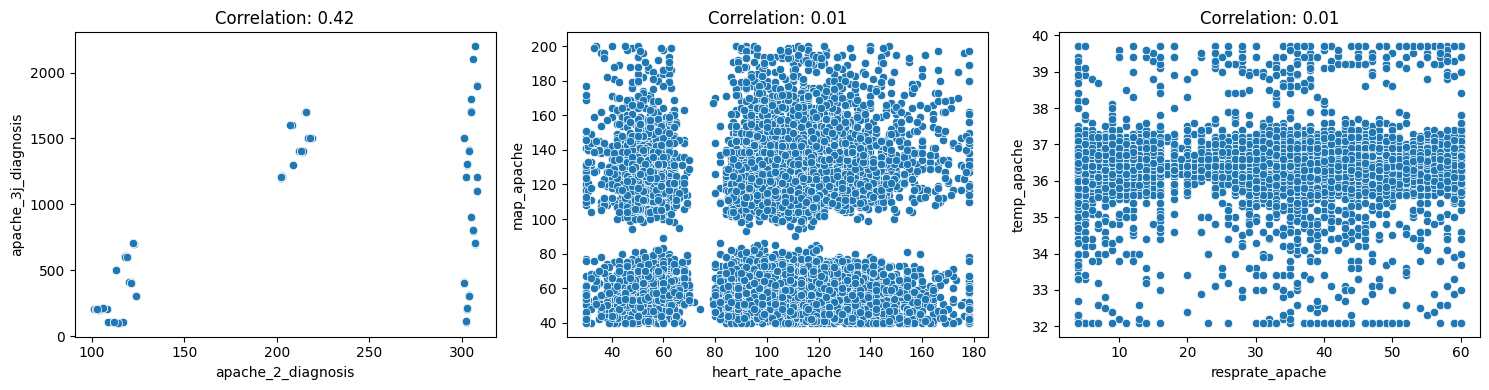

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival Prediction.csv')

if df[['apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'temp_apache']].isnull().any().any():
    print("Warning: Missing values present in the selected columns.")

selected_columns = ['apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'temp_apache']
df[selected_columns] = df[selected_columns].astype(float)

corr_var1_var2 = df['apache_2_diagnosis'].corr(df['apache_3j_diagnosis'])
corr_var3_var4 = df['heart_rate_apache'].corr(df['map_apache'])
corr_var5_var6 = df['resprate_apache'].corr(df['temp_apache'])

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['apache_2_diagnosis'], y=df['apache_3j_diagnosis'])
plt.title(f'Correlation: {corr_var1_var2:.2f}')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['heart_rate_apache'], y=df['map_apache'])
plt.title(f'Correlation: {corr_var3_var4:.2f}')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['resprate_apache'], y=df['temp_apache'])
plt.title(f'Correlation: {corr_var5_var6:.2f}')

plt.tight_layout()
plt.show()